<a href="https://colab.research.google.com/github/KevOdhiambo/Thyroid-Prediction-Model-in-Patients/blob/main/Hypothyroidsim_Prediction_In_Patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hypothyroidism Prediction In Patients 

##Specify the Anlysis Question
Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid. THe model is purely based on **Decision Trees** and **Support Vector Machine**.

##Metrics of Success
1. Find the most accurate model based on our prediction models
2. Find which factors have a higher influence on hypothyroidism

##Understanding the Content
Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. I'm supposed to use the healthcare datasets provided to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

##Experimnetal Design Process
1. Data loading
2. Detection and handling of missing values.
3. Type conversion.
4. Splitting data
5. Modelling using decision trees
6. Hyperparameter tuning
7. Feature importance ranking
8. Modelling using svm
9. Rank important features for prediction
10. Results and conclusion.
11. Challenging the solution

##Importing Libraries and Data Loading

In [49]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.decomposition import PCA

%matplotlib inline
sns.set()
plt.rcParams['figure.figsize'] = (10.0, 8.0)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#load the dataset
hypothyroid=pd.read_csv("hypothyroid.csv")
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


##Data Exploration

In [3]:
#check the data type
hypothyroid.shape

#the dataset has 3163 entries and 26 columns

(3163, 26)

In [4]:
#inspect the dataset info
hypothyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

The entries are objects including Age, T3, TT4, T4U and FTI which should be integer/ float.

In [5]:
#check the unique values in the dataset
col_names = hypothyroid.columns.to_list()

for col in col_names:
  print(f'Column: {col} \n')
  print(hypothyroid[col].unique())
  print('************** \n \n')

Column: status 

['hypothyroid' 'negative']
************** 
 

Column: age 

['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
************** 
 

Column: sex 

['M' 'F' '?']
************** 
 

Column: on_thyroxine 

['f' 't']
************** 
 

Column: query_on_thyroxine 

['f' 't']
************** 
 

Column: on_antithyroid_medication 

['f' 't']
************** 
 

Column: thyroid_surgery 

['f' 't']
************** 
 

Column: query_hypothyroid 

['f' 't']
************** 
 

Column: query_hyperthyroid 

['f' 't']
************** 
 

Column: pregnant 

['f' 't']
************** 
 


The sex, T4U, FTI, and TBG columns have '?' in their entries which i'll count as missing values in teh dataset.

In [6]:
#replace the '?' with nan entries
#check for missing values after replacing the "?"

hypothyroid.replace('?', np.nan, inplace=True)

In [7]:
#proceed to check for missing values
hypothyroid.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [8]:
#I'll drop the TBG column as its almost empty(has more null values) along with TBG_measured.
hypothyroid.drop(['TBG','TBG_measured'], axis=1, inplace=True)



In [9]:
#change the object data types which have numerical values to integer/float
columns = ['age','TSH','T3','TT4','T4U','FTI']
hypothyroid[columns] = hypothyroid[columns].apply(pd.to_numeric, errors='coerce',axis=1)
hypothyroid.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
dtype: object

##EDA



###Univariate Analysis

In [10]:
#now get statistical information of the numerical entries
hypothyroid.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,2717.0,51.154214,19.294405,1.0,35.00,54.00,67.000,98.00
TSH,2695.0,5.923180,23.899467,0.0,0.00,0.70,2.300,530.00
T3,2468.0,1.939749,0.996773,0.0,1.40,1.80,2.300,10.20
TT4,2914.0,108.850000,45.485419,2.0,83.00,104.00,128.000,450.00
T4U,2915.0,0.978199,0.226580,0.0,0.85,0.96,1.065,2.21
FTI,2916.0,115.397771,60.239572,0.0,91.00,107.00,129.000,881.00


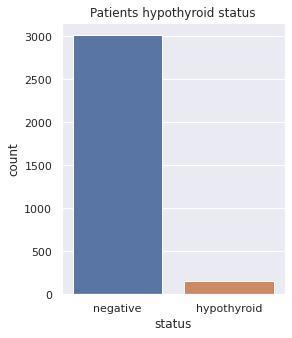

In [11]:
#Check how many people are suffering from hypothyroid
plt.figure(figsize=(4, 5))
sns.countplot(hypothyroid.status, order = hypothyroid.status.value_counts().index)
plt.title("Patients hypothyroid status")
plt.show()
 

most people from the dataset do not suffer from hypothyroid

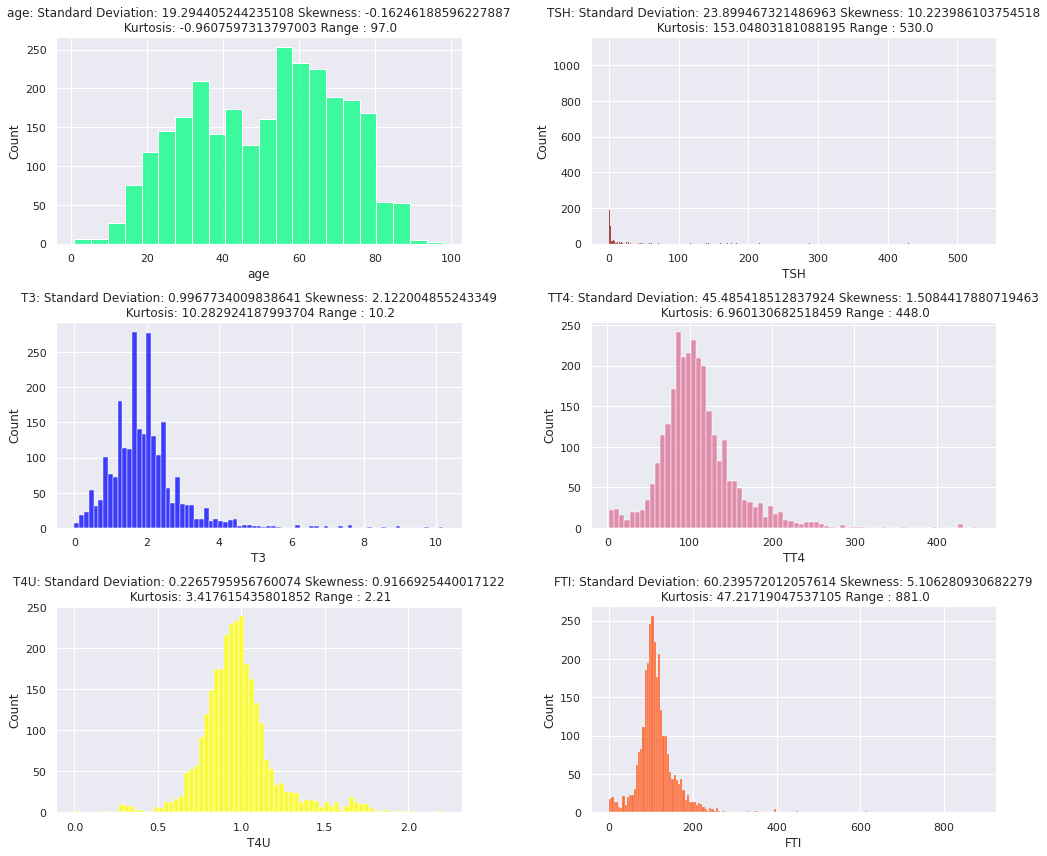

In [12]:
#plot summaries on the numerical entries in the dataset.

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
colors = ['#00FF7F', '#8B0000', '#0000FF', '#DB7093', '#FFFF00', '#FF4500']

for col, colour, ax in zip(columns, colors, axes.flatten()):

  standard_var = hypothyroid[col].std()
  skew = hypothyroid[col].skew()
  kurt = hypothyroid[col].kurt()
  range = hypothyroid[col].max() - hypothyroid[col].min()

  sns.histplot(hypothyroid[col],  ax=ax, color=colour)
  ax.set_title(f'{col}: Standard Deviation: {standard_var} Skewness: {skew}\n Kurtosis: {kurt} Range : {range}')

plt.tight_layout()
plt.show()

Those with ages 55 to 60 are the majority in or dataset.
TSH, FTI, T3 and TT4 are skewed to the left. while the T4U is unskewed.


###Bivariate Analysis

In [13]:
#handling missing values
#i opted to carry out imputation using the mean, median and mode

#for missing values in the sex column, i'll fill it with mode as its categorical
hypothyroid.fillna({'sex': hypothyroid['sex'].mode()[0]}, inplace=True)

In [14]:
#data that is not skewed, i'll use the mean for the imputation process and skwewed data the median
val_filling= {'T3':hypothyroid.T3.median(), 'age': hypothyroid.age.mean(), 'FTI': hypothyroid.FTI.median(), 'T4U': hypothyroid.T4U.mean(), 'TSH': hypothyroid.TSH.median(), 'TT4':hypothyroid.TT4.median()}
hypothyroid.fillna(val_filling, inplace=True)


In [15]:
#replacing the categorical features(the columns with true and false/yes and no) with place values(0 and 1)

hypothyroid['on_thyroxine'].replace(['t', 'f'],[1,0],inplace=True)
hypothyroid['query_on_thyroxine'].replace(['t', 'f'],[1,0],inplace=True)
hypothyroid['on_antithyroid_medication'].replace(['t', 'f'],[1,0],inplace=True)
hypothyroid['thyroid_surgery'].replace(['t', 'f'],[1,0],inplace=True)
hypothyroid['query_hypothyroid'].replace(['t', 'f'],[1,0],inplace=True)
hypothyroid['query_hyperthyroid'].replace(['t', 'f'],[1,0],inplace=True)
hypothyroid['pregnant'].replace(['t', 'f'],[1,0],inplace=True)
hypothyroid['sick'].replace(['t', 'f'],[1,0],inplace=True)
hypothyroid['tumor'].replace(['t', 'f'],[1,0],inplace=True)
hypothyroid['lithium'].replace(['t', 'f'],[1,0],inplace=True)
hypothyroid['goitre'].replace(['t', 'f'],[1,0],inplace=True)
hypothyroid['status'].replace(['hypothyroid', 'negative'],[1,0],inplace=True)
hypothyroid['sex'].replace(['M', 'F'],[1,0],inplace=True)
hypothyroid['T4U_measured'].replace(['y','n'],[1,0],inplace=True)
hypothyroid['FTI_measured'].replace(['y','n'],[1,0],inplace=True)
hypothyroid['TSH_measured'].replace(['y','n'],[1,0],inplace=True)
hypothyroid['T3_measured'].replace(['y','n'],[1,0],inplace=True)
hypothyroid['TT4_measured'].replace(['y','n'],[1,0],inplace=True)


#show our new data.

thyroid=hypothyroid
thyroid


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,1,72.0,1,0,0,0,0,0,0,0,...,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0
1,1,15.0,0,1,0,0,0,0,0,0,...,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0
2,1,24.0,1,0,0,0,0,0,0,0,...,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0
3,1,24.0,0,0,0,0,0,0,0,0,...,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0
4,1,77.0,1,0,0,0,0,0,0,0,...,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,0,58.0,0,0,0,0,0,0,0,0,...,1,5.8,1,1.7,1,86.0,1,0.91,1,95.0
3159,0,29.0,0,0,0,0,0,0,0,0,...,1,0.8,1,1.8,1,99.0,1,1.01,1,98.0
3160,0,77.0,1,0,0,0,0,0,0,0,...,1,1.2,1,0.6,1,71.0,1,0.68,1,104.0
3161,0,74.0,0,0,0,0,0,0,0,0,...,1,1.3,1,0.1,1,65.0,1,0.48,1,137.0


In [16]:
#check value counts of my target.
thyroid['status'].value_counts()

0    3012
1     151
Name: status, dtype: int64

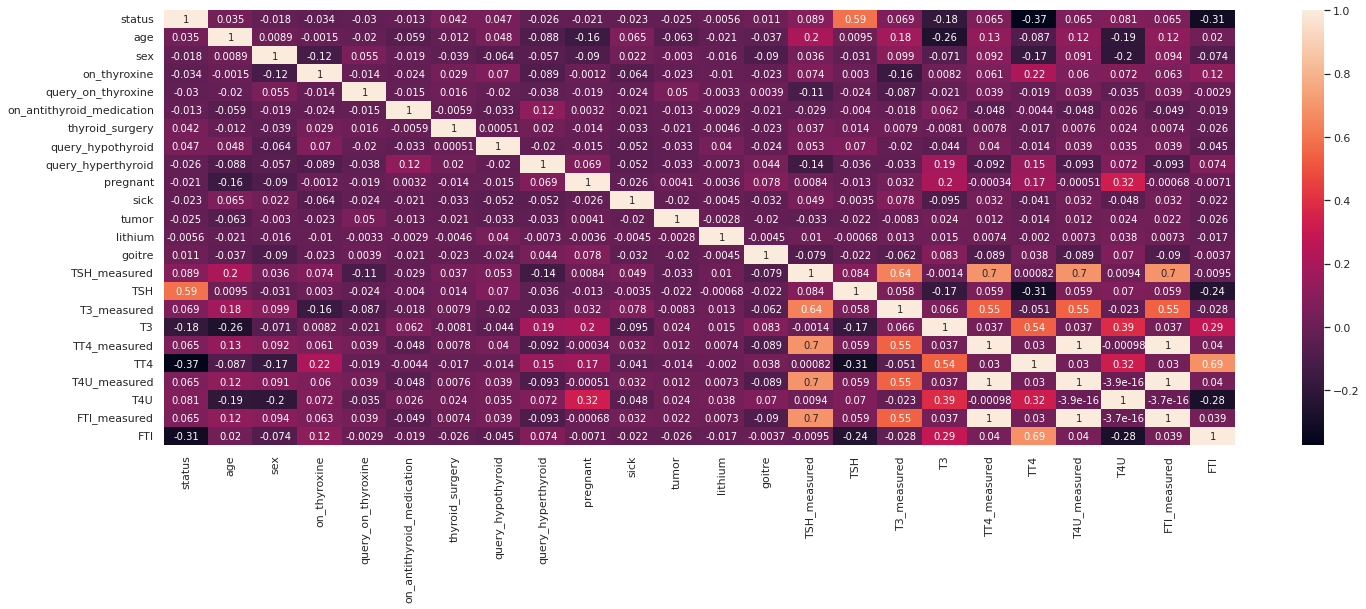

In [17]:
#Plotting correlation values using a heatmap 
plt.figure(figsize=(24, 8))
vg_corr = thyroid.corr()
sns.heatmap(vg_corr,xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);
plt.show()

There is high correlation between the TSH_measured with FTI_measured, T4U_measured, T4_measured and T3_measured. Also there is high correlation between TT4 with FTI an T3. Lastly, there is a high correlation between status an TSH.
  

#Modelling

##Decision Trees

In [18]:
# import Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

###Random Forest

In [19]:
# Split data into train and test sets
X = thyroid.drop('status', axis=1)
Y = thyroid['status']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=23, stratify = Y)


In [20]:
# fit random forest model with base parameters
random_classifier = RandomForestClassifier()
random_classifier.fit(x_train, y_train)
# Make predictions
y_pred = random_classifier.predict(x_test)


In [21]:
# Get probabilities for positive outcomes
y_prob = random_classifier.predict_proba(x_test)[:, 1]

# Get auc score
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob)}')

ROC AUC Score: 0.9850172074729597


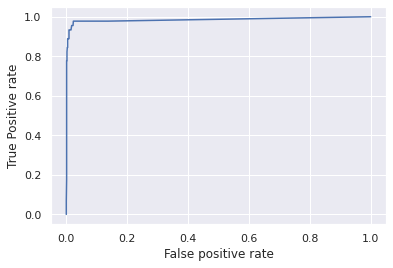

In [22]:
# Plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')
plt.show()

The roc curve tells us that the model is perfoming well as the curve iss closer to the top left corner.

###Gradient Boost

In [23]:
# Intialize and fit gradient boost classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(x_train, y_train)
# Make predictions
y_pred_gb = gb_classifier.predict(x_test)


In [24]:
# Get probabilities for positive outcomes
y_prob_gb = gb_classifier.predict_proba(x_test)[:, 1]

# Get auc score
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob_gb)}')

ROC AUC Score: 0.9768805309734513


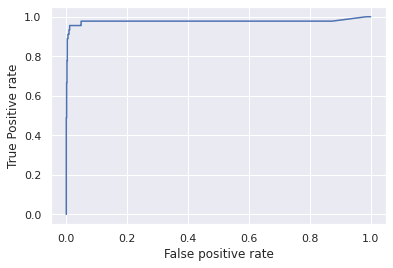

In [25]:
# Plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_gb)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')
plt.show()

Also here from the curve we can tell the classification model is perfoming well.

###ADABoost

In [26]:
# Intialize adaboost model with a decision tree base model
adaboost_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
adaboost_classifier.fit(x_train, y_train)
# Make predictions
y_pred_ada = adaboost_classifier.predict(x_test)

In [27]:
# Get probabilities for positive outcomes
y_prob_ada = adaboost_classifier.predict_proba(x_test)[:, 1]

# Get auc score
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob_ada)}')

ROC AUC Score: 0.9569690265486726


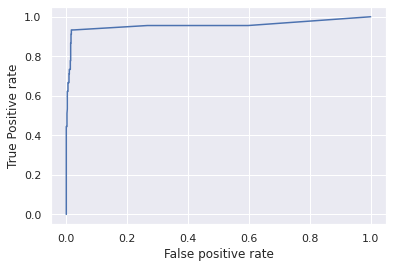

In [28]:
# Plotting the roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_ada)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')
plt.show()

from all the three models, Random Forest(0.9831) has the highest accuracy score, followed by Gradient Boost(0.9769) and lastly ADA Boost(0.9669). 

##Hyperparameter Tuning

####Tuning RAndom Forest

In [29]:
# Defining the parameter grid for parameter tuning
param_grid_ = {
    'max_depth': np.arange(80, 200, 10),
    'min_samples_leaf': [2,3],
    'n_estimators': [100, 200, 300, 500, 800]
}
# Perform cross validation
grid_search_rand = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid_, cv = 3, n_jobs = -1, verbose = 0, scoring='roc_auc')

In [30]:
# obtain the best parameters
grid_search_rand.fit(x_train, y_train)
grid_search_rand.best_params_


{'max_depth': 150, 'min_samples_leaf': 2, 'n_estimators': 200}

In [31]:
#get the best tuning based on tuning
grid_search_rand.best_score_

0.9959273627889612

The accracy has imporved from 0.9831, which is great

####Tuning ADA Boost

In [32]:
# Tune Gradient Boost model
param_grid_ADA = {
    'learning_rate': np.arange(0.7, 1.0, 0.05),
    'n_estimators': [50, 100, 200],
    'base_estimator__max_depth': np.arange(80, 110, 10),
    'base_estimator__min_samples_leaf': [2,3,4]
}
grid_search_ADA = GridSearchCV(estimator =AdaBoostClassifier(base_estimator=DecisionTreeClassifier()), param_grid = param_grid_ADA, cv = 3, n_jobs = -1, verbose = 0, scoring='roc_auc')

In [33]:
# Get best parameters
grid_search_ADA.fit(x_train, y_train)
grid_search_ADA.best_params_

{'base_estimator__max_depth': 100,
 'base_estimator__min_samples_leaf': 4,
 'learning_rate': 0.9500000000000002,
 'n_estimators': 100}

In [34]:
# Obtain the best score afer tuning ADA Boost
grid_search_ADA.best_score_

0.9950560793640717

The accuracy has improved pretty much from 0.9669

##Rank important features for prediction

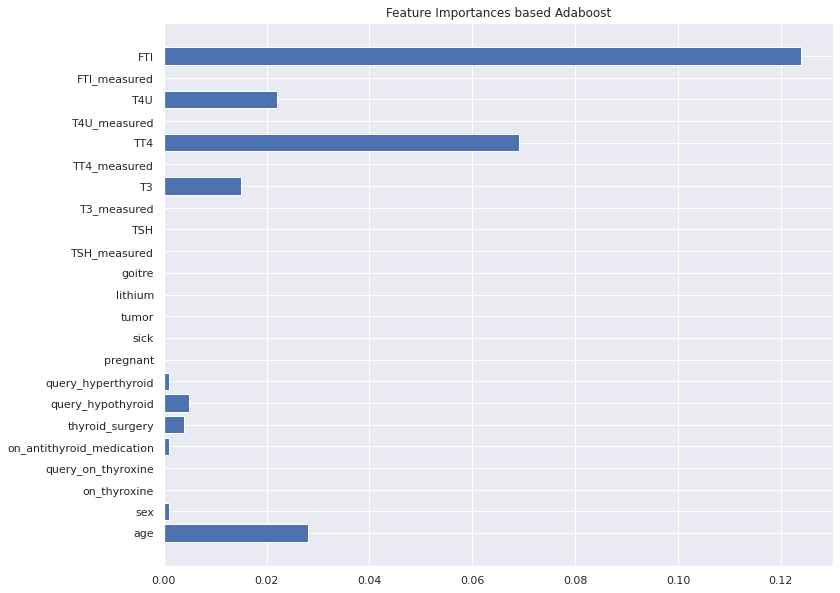

In [35]:
# Rank feature importances in ADA Boost
importances_ada = [round(x, 3) for x in adaboost_classifier.feature_importances_]
plt.figure(figsize=(12, 10))
plt.barh(X.columns.to_list(), importances_ada)
plt.title('Feature Importances based Adaboost')
plt.show()

Top influencing eatures are:
1. FTI
2. TT4
3. Age
4. T4U
5. T3

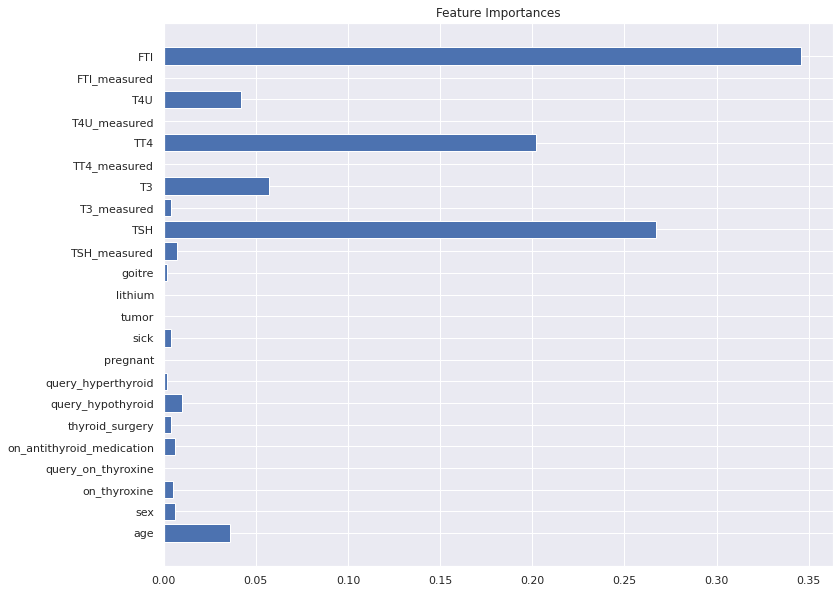

In [36]:
# Rank feature importance in Random Forest
importances_random = [round(x, 3) for x in random_classifier.feature_importances_]
plt.figure(figsize=(12, 10))
plt.barh(X.columns.to_list(), importances_random)
plt.title('Feature Importances')
plt.show()

Top 5 important features as per random forest are:

1. FTI
2. TSH
3. TT4
4. T3
5. T4U

#SVM

I'm goin to use the top features from the ADA boost an Random Forest tuning in my SVM classification.

In [37]:
# Define features and target variable
top_features = thyroid[['FTI', 'T3', 'TSH', 'TT4', 'T4U', 'age']]
df_pca = thyroid.drop('status', axis=1)
Y = thyroid['status']

In [38]:
# intergrate pca 
pca = PCA().fit(df_pca)

# getting the explained variance ratio
evr = pca.explained_variance_ratio_
range_length = len(evr) + 1

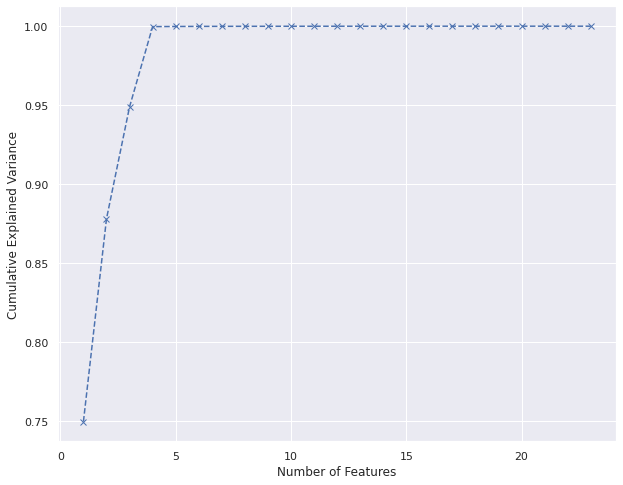

In [39]:
# plotting the explained variance ratio so as to find out which features to use.
plt.figure(figsize = (10, 8))
plt.plot(__builtin__.range(1, range_length), evr.cumsum(), marker = 'x', linestyle = '--')
plt.xlabel("Number of Features")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

at least four features have a big impact on our variance, as such i'll reduce the feature components to at least 4.

In [40]:
# Reduce the feature set to 4 components
pca_x = PCA(n_components=4).fit_transform(df_pca)

In [41]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(pca_x, Y, test_size=.3, stratify=Y)
x_train_tree, x_test_tree, y_train_tree, y_test_tree = train_test_split(top_features, Y, test_size=.3, stratify=Y)

In [42]:
# Standard features
sc_tree = StandardScaler().fit(x_train_tree)
x_train_tree = sc_tree.transform(x_train_tree)
x_test_tree = sc_tree.transform(x_test_tree)

scaler_pca = StandardScaler().fit(x_train)
x_train = scaler_pca.transform(x_train)
x_test = scaler_pca.transform(x_test)

##RBF Function

In [43]:
# Build model with an RBF kernel 
svc_pca = SVC(kernel='rbf', probability=True).fit(x_train, y_train)
svc_tree = SVC(kernel = 'rbf', probability=True).fit(x_train_tree, y_train_tree)

In [44]:
# Get the roc_auc scores and probabilities for positive outcomes
y_prob_pca = svc_pca.predict_proba(x_test)[:, 1]
y_prob_tree = svc_tree.predict_proba(x_test_tree)[:, 1]


# Get auc score
print(f'ROC AUC Score with PCA reduced data: {roc_auc_score(y_test, y_prob_pca)}')
print(f'ROC AUC Score with tree features: {roc_auc_score(y_test_tree, y_prob_tree)}')

ROC AUC Score with PCA reduced data: 0.9842920353982301
ROC AUC Score with tree features: 0.9890609636184857


the features selected by decision trees as done well compared to PCA reduced data.

##Sigmoid Function

In [45]:
# Build model with a sigmoid kernel 
svc_pca = SVC(kernel='sigmoid', probability=True).fit(x_train, y_train)
svc_tree = SVC(kernel = 'sigmoid', probability=True).fit(x_train_tree, y_train_tree)

In [46]:
# Get the roc_auc scoresl and probabilities for positive outcomes
y_prob_pca = svc_pca.predict_proba(x_test)[:, 1]
y_prob_tree = svc_tree.predict_proba(x_test_tree)[:, 1]


# Get auc score
print(f'ROC AUC Score with PCA reduced data: {roc_auc_score(y_test, y_prob_pca)}')
print(f'ROC AUC Score with tree features: {roc_auc_score(y_test_tree, y_prob_tree)}')

ROC AUC Score with PCA reduced data: 0.9333333333333335
ROC AUC Score with tree features: 0.9459193706981317


##Polynomial Function

In [47]:
# Build model with a polynomial kernel 
svc_pca = SVC(kernel='poly',degree=3,gamma='auto', probability=True).fit(x_train, y_train)
svc_tree = SVC(kernel='poly',degree=3,gamma='auto', probability=True).fit(x_train_tree, y_train_tree)

In [48]:
# Get the roc_auc scoresl and probabilities for positive outcomes
y_prob_pca = svc_pca.predict_proba(x_test)[:, 1]
y_prob_tree = svc_tree.predict_proba(x_test_tree)[:, 1]


# auc score
print(f'ROC AUC Score with PCA reduced data: {roc_auc_score(y_test, y_prob_pca)}')
print(f'ROC AUC Score with tree features: {roc_auc_score(y_test_tree, y_prob_tree)}')

ROC AUC Score with PCA reduced data: 0.9470501474926253
ROC AUC Score with tree features: 0.9672074729596852


The RBF Function Kernel did well using the PCA redduced data compared to the other models on kernel.

#Conclusion

The best perfoming model for this prediction whether a patient is likely to have thyroid or not, is RAndom Forest after hyperparametr tuning. It had an accuracy score of 99.59% which pretty gooood on the classifiication model. It was followed closely by ADA boost after tuning as well. Also this means that for further accuracy, our models needs tuning to attaing great accuracy levels.


Again from the anmodelling, the top features that prredicted whether a patient had thyroid or not were FTI, TT4, T3, TSH and Age.